In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#importing dataset
df=pd.read_csv('diabetes.csv')
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df.isnull().sum()/len(df)*100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

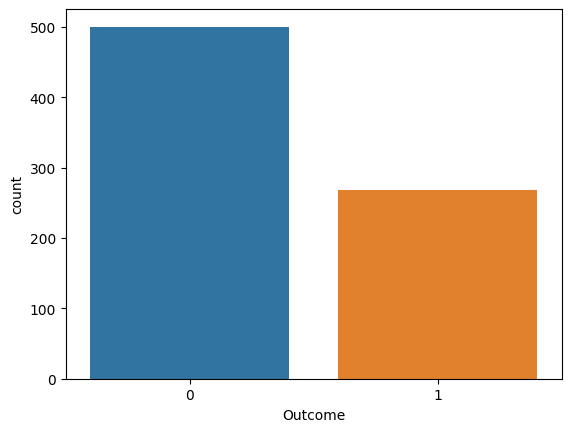

In [25]:
# distribution of outcome
sns.countplot(x='Outcome',data=df)
plt.show()

In [26]:
from scipy import stats
def remove_outliers_zscore(df, threshold=3):
    z_scores = np.abs(stats.zscore(df))
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    return df_no_outliers

In [27]:
df_no_outliers = remove_outliers_zscore(df)

In [28]:
df_no_outliers.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.845930,120.293605,72.345930,20.787791,72.507267,32.209157,0.454555,33.094477,0.329942
std,3.279256,30.005790,12.312859,15.405391,90.106939,6.618891,0.284527,11.436990,0.470534
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,43.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.300000,0.605500,40.000000,1.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,55.000000,1.461000,68.000000,1.000000


In [33]:
#seperating input and outcome
X=df_no_outliers.iloc[:,:-1]
y=df_no_outliers['Outcome']

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=123)

In [36]:
Xtrain.shape,ytrain.shape

((550, 8), (550,))

In [37]:
Xtest.shape,ytest.shape

((138, 8), (138,))

In [38]:
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.transform(Xtest)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,classification_report


In [40]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
ra=RandomForestClassifier()
svm=SVC(kernel="linear",probability=True)

In [41]:
def model_building(model):
    model.fit(Xtrain,ytrain)
    ypred_train=model.predict(Xtrain)
    ypred_test=model.predict(Xtest)
    print(model)
    print("Train Data")
    print(classification_report(ytrain,ypred_train))
    print("Test Data")
    print(classification_report(ytest,ypred_test))

In [42]:
from sklearn.metrics import log_loss

def calculate_logloss(model,ytest):
    print('log_loss:')
    ytest_prob= model.predict_proba(Xtest)

    logloss = log_loss(ytest, ytest_prob[:,-1])
    return logloss

In [43]:
model_building(lr)
calculate_logloss(lr,ytest)

LogisticRegression()
Train Data
              precision    recall  f1-score   support

           0       0.82      0.92      0.86       369
           1       0.77      0.58      0.66       181

    accuracy                           0.81       550
   macro avg       0.79      0.75      0.76       550
weighted avg       0.80      0.81      0.80       550

Test Data
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        92
           1       0.65      0.61      0.63        46

    accuracy                           0.76       138
   macro avg       0.73      0.72      0.73       138
weighted avg       0.76      0.76      0.76       138

log_loss:


0.4958555232290544

In [44]:
model_building(dt)
calculate_logloss(dt,ytest)

DecisionTreeClassifier()
Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       181

    accuracy                           1.00       550
   macro avg       1.00      1.00      1.00       550
weighted avg       1.00      1.00      1.00       550

Test Data
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        92
           1       0.51      0.59      0.55        46

    accuracy                           0.67       138
   macro avg       0.64      0.65      0.65       138
weighted avg       0.69      0.67      0.68       138

log_loss:


11.75336523558168

In [45]:
model_building(svm)
calculate_logloss(svm,ytest)

SVC(kernel='linear', probability=True)
Train Data
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       369
           1       0.80      0.57      0.67       181

    accuracy                           0.81       550
   macro avg       0.81      0.75      0.77       550
weighted avg       0.81      0.81      0.80       550

Test Data
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        92
           1       0.63      0.52      0.57        46

    accuracy                           0.74       138
   macro avg       0.71      0.68      0.69       138
weighted avg       0.73      0.74      0.73       138

log_loss:


0.49431813062728686

In [46]:
model_building(ra)
calculate_logloss(ra,ytest)

RandomForestClassifier()
Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       181

    accuracy                           1.00       550
   macro avg       1.00      1.00      1.00       550
weighted avg       1.00      1.00      1.00       550

Test Data
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        92
           1       0.64      0.65      0.65        46

    accuracy                           0.76       138
   macro avg       0.73      0.73      0.73       138
weighted avg       0.76      0.76      0.76       138

log_loss:


0.4935652871987179

In [47]:
lr_logloss=calculate_logloss(lr,ytest)
dt_logloss=calculate_logloss(dt,ytest)
ra_logloss=calculate_logloss(ra,ytest)
svm_logloss=calculate_logloss(svm,ytest)

log_loss:
log_loss:
log_loss:
log_loss:


In [48]:
data = {
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest','SVM'],
    'Log Loss': [lr_logloss, dt_logloss, ra_logloss,svm_logloss]
}
log_loss_table = pd.DataFrame(data)

In [49]:
log_loss_table

,Algorithm,Log Loss
0,Logistic Regression,0.495856
1,Decision Tree,11.753365
2,Random Forest,0.493565
3,SVM,0.494318


###  Logistic regression is a better choice as it has the best fitting in comparision to other algos


In [50]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
input=[0,100,60,18,60,25,0.637,22]
input_arr=np.array(input)

In [52]:
input_arr=input_arr.reshape(1,-1)

In [53]:
input_arr

array([[  0.   , 100.   ,  60.   ,  18.   ,  60.   ,  25.   ,   0.637,
         22.   ]])

In [54]:
std_input=sc.transform(input_arr)

In [55]:
std_input

array([[-1.16939612, -0.65276253, -0.98261131, -0.15237384, -0.12465716,
        -1.06156776,  0.58353375, -0.96337219]])

In [56]:
prediction=lr.predict(std_input)

In [57]:
prediction #gives us a array 

array([0], dtype=int64)

In [58]:
prediction[0] # to get the actual prediction value.

0

In [59]:
if (prediction[0]==1):
    print("The person is Diabetic")
else:
    print("The person is not Diabetic")

The person is not Diabetic


In [60]:
input=pd.DataFrame

In [61]:
import pickle
pickle.dump(lr,open("model.pkl","wb"))


In [62]:
pickle.dump(sc,open("scaler.pkl","wb"))